
W tym zadaniu dysponujesz gotowym plikami z danymi pomiarowymi — **`sinogram1.npz`** oraz **`sinogram2.npz`**  — które zawieraja sinogramy pewnych obrazow
Twoim zadaniem będzie :
1. wczytanie pliku
2. wyswietlenie sinogramu ( podpisanie osi X i Y )
3. zrobienie projekcji wstecznej
4. zrobienie fitrowanej projekcji wstecznej
5. napisanie dlaczego filtrowana projekcja wsteczna dziala oraz jak dziala
   ( podpowiedz w notebooku )

---

## 📦 Zawartość pliku `sinogram.npz`

Plik `sinogram.npz` jest archiwum NumPy (`.npz`), które zawiera dwie tablice:

| Nazwa w pliku | Typ danych | Opis |
|----------------|-------------|------|
| `sinogram` | 2D macierz (`float64`) | Zawiera wartości projekcji dla różnych kątów. Każda kolumna odpowiada innej orientacji źródła promieniowania. |
| `angles` | 1D wektor (`float64`) | Lista kątów (w stopniach) odpowiadających kolumnom sinogramu. |

---
Matematycznie:
$$
\text{sinogram}[i, j] = \text{projekcja w pozycji } i \text{ pod kątem } \theta_j
$$

---

## 📥 Jak wczytać dane

```
import numpy as np

# Wczytanie pliku sinogramu
data = np.load("sinogram.npz")

# Podgląd zawartości
print(data.files)        # ['sinogram', 'angles']

```

---
Podpowiedz :
---
from skimage.transform import iradon

Prosze uzyc tej funkcji zarowno do projekcji wstecznej oraz filtrowanej projekcji wstecznej



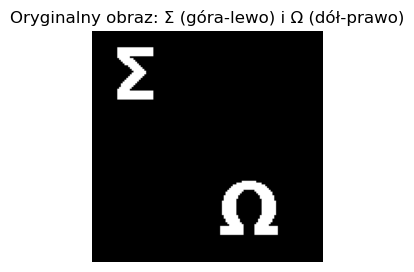

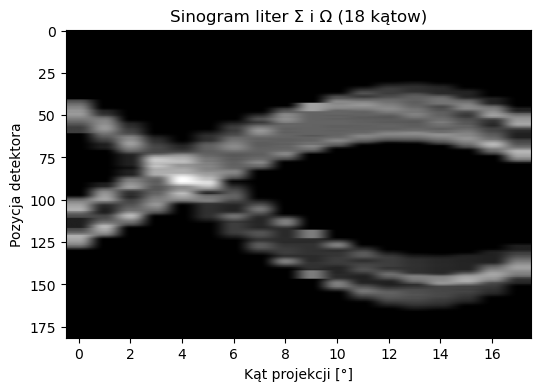

✅ Zapisano sinogram do pliku: sinogram1.npz


In [11]:
# ======================================================
# 👨‍🏫 CZĘŚĆ NAUCZYCIELA – generowanie obrazu i sinogramu
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon
from PIL import Image, ImageDraw, ImageFont

# --- 1. Utworzenie obrazu 128×128 z literami Σ i Ω ---
N = 128
img = Image.new("L", (N, N), color=0)  # obraz w odcieniach szarości
draw = ImageDraw.Draw(img)

# Czcionka z obsługą greckich liter
font = ImageFont.truetype("DejaVuSans-Bold.ttf", 40)

# Rysowanie dużej litery Σ (lewy górny róg)
draw.text((10, 0), "Σ", fill=255, font=font)

# Rysowanie dużej litery Ω (prawy dolny róg)
draw.text((70, 75), "Ω", fill=255, font=font)

# Konwersja do tablicy NumPy i binarnej maski
letters = np.array(img)
letters = (letters > 128).astype(np.float32)

plt.figure(figsize=(3,3))
plt.imshow(letters, cmap="gray")
plt.title("Oryginalny obraz: Σ (góra-lewo) i Ω (dół-prawo)")
plt.axis("off")
plt.show()

# --- 2. Generacja sinogramu (Radon transform) ---
angles = np.linspace(0., 180., 18, endpoint=False)
sinogram = radon(letters, theta=angles, circle=False)

plt.figure(figsize=(6,4))
plt.imshow(sinogram, cmap='gray', aspect='auto')
plt.title("Sinogram liter Σ i Ω (18 kątow)")
plt.xlabel("Kąt projekcji [°]")
plt.ylabel("Pozycja detektora")
plt.show()

# --- 3. Zapis sinogramu do pliku dla studentów ---
np.savez("sinogram1.npz", sinogram=sinogram, angles=angles)
print("✅ Zapisano sinogram do pliku: sinogram1.npz")

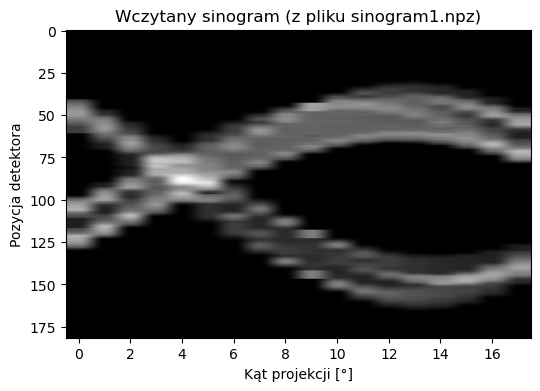

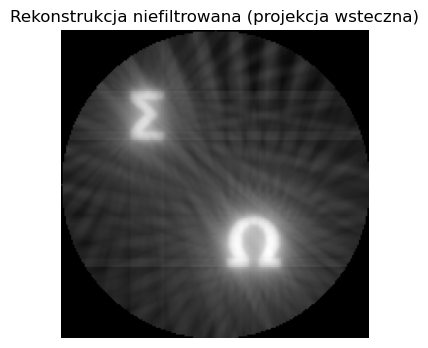

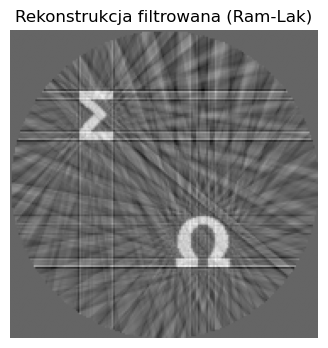

In [12]:

# ======================================================
# 👩‍🎓 CZĘŚĆ STUDENTA – wczytanie i rekonstrukcja
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import iradon

# --- 1. Wczytanie sinogramu ---
data = np.load("sinogram1.npz")
sinogram = data["sinogram"]
angles = data["angles"]

plt.figure(figsize=(6,4))
plt.imshow(sinogram, cmap='gray', aspect='auto')
plt.title("Wczytany sinogram (z pliku sinogram1.npz)")
plt.xlabel("Kąt projekcji [°]")
plt.ylabel("Pozycja detektora")
plt.show()

# --- 2. Rekonstrukcja niefiltrowana (projekcja wsteczna) ---
recon_unfiltered = iradon(sinogram, theta=angles, filter_name=None)

plt.figure(figsize=(4,4))
plt.imshow(recon_unfiltered, cmap='gray')
plt.title("Rekonstrukcja niefiltrowana (projekcja wsteczna)")
plt.axis('off')
plt.show()

# --- 3. Rekonstrukcja filtrowana (Ram-Lak) ---
recon_filtered = iradon(sinogram, theta=angles, filter_name='ramp')

plt.figure(figsize=(4,4))
plt.imshow(recon_filtered, cmap='gray')
plt.title("Rekonstrukcja filtrowana (Ram-Lak)")
plt.axis('off')
plt.show()

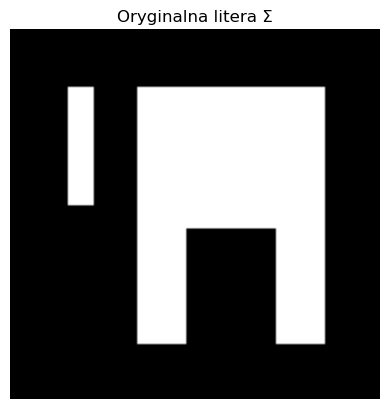

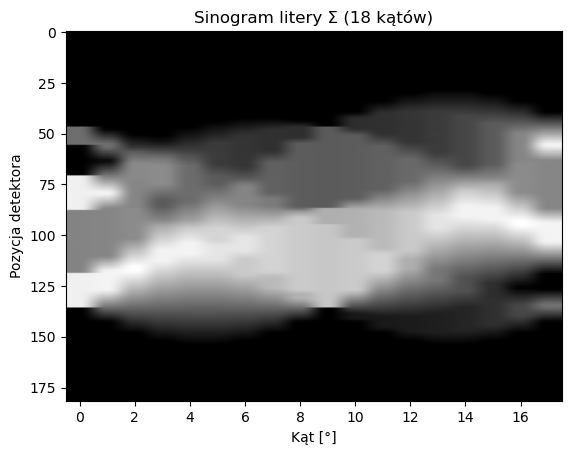

✅ Zapisano sinogram do pliku: sinogram2.npz


In [9]:
# ======================================================
# 👨‍🏫 CZĘŚĆ NAUCZYCIELA – generowanie obrazu i sinogramu
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon
from skimage.transform import radon, iradon


# --- 1. Utworzenie litery Σ ---
N = 128
img = np.zeros((N, N))
rr, cc = polygon([20,20,108,108,68,68,108,108,20,20,60,60],
                 [20,108,108,92,92,60,60,44,44,28,28,20])
img[rr, cc] = 1

plt.imshow(img, cmap='gray')
plt.title("Oryginalna litera Σ")
plt.axis('off')
plt.show()

# --- 2. Generacja projekcji (sinogramu) ---
angles = np.linspace(0., 180., 18, endpoint=False)
sinogram = radon(img, theta=angles, circle=False)

plt.imshow(sinogram, cmap='gray', aspect='auto')
plt.title("Sinogram litery Σ (18 kątów)")
plt.xlabel("Kąt [°]")
plt.ylabel("Pozycja detektora")
plt.show()

# --- 3. Zapis sinogramu do pliku ---
np.savez("sinogram2.npz", sinogram=sinogram, angles=angles)
print("✅ Zapisano sinogram do pliku: sinogram2.npz")

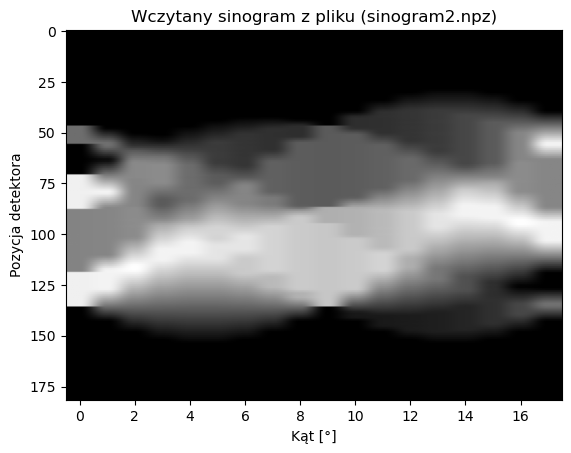

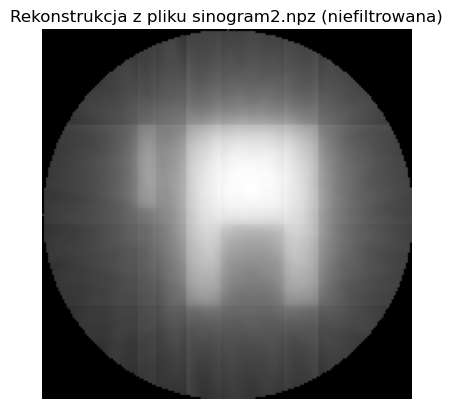

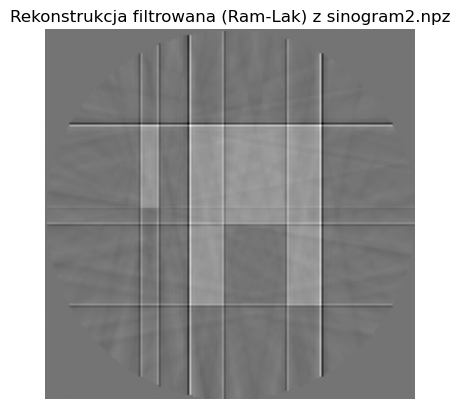

In [8]:

# ======================================================
# 👩‍🎓 CZĘŚĆ STUDENTA – wczytanie i rekonstrukcja
# ======================================================

data = np.load("sinogram2.npz")
sinogram_loaded = data["sinogram"]
angles_loaded = data["angles"]

plt.imshow(sinogram_loaded, cmap='gray', aspect='auto')
plt.title("Wczytany sinogram z pliku (sinogram2.npz)")
plt.xlabel("Kąt [°]")
plt.ylabel("Pozycja detektora")
plt.show()

# --- 5. Rekonstrukcja z wczytanego sinogramu ---
reconstruction = iradon(sinogram_loaded, theta=angles_loaded, filter_name=None)
plt.imshow(reconstruction, cmap='gray')
plt.title("Rekonstrukcja z pliku sinogram2.npz (niefiltrowana)")
plt.axis('off')
plt.show()

# --- 6. Rekonstrukcja filtrowana (Ram-Lak) ---
reconstruction_filt = iradon(sinogram_loaded, theta=angles_loaded, filter_name='ramp')
plt.imshow(reconstruction_filt, cmap='gray')
plt.title("Rekonstrukcja filtrowana (Ram-Lak) z sinogram2.npz")
plt.axis('off')
plt.show()
